# Plotting and data analysis for lebwohl lasher project

<function matplotlib.pyplot.show(close=None, block=None)>

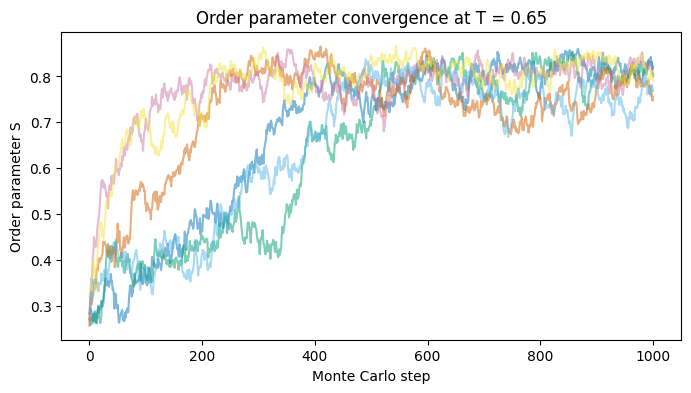

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


serialfile = "outputs/serial_1000_20_0.65.txt"
numbafile = "outputs/numba_1000_20_0.65.txt"
cythonfile = "outputs/cython_1000_20_0.65.txt"
vecfile = "outputs/numpyvec_1000_20_0.65.txt"
mpi4py_1corefile = "outputs/mpi4py_1core_1000_20_0.65.txt"
mpi4py_4corefile = "outputs/mpi4py_4core_1000_20_0.65.txt"


serial_df = pd.read_csv(serialfile, comment ="#", sep='\s+',
                    names = ["Step", "Ratio", "Energy", "Order"])

numba_df = pd.read_csv(numbafile, comment ="#", sep='\s+',
                    names = ["Step", "Ratio", "Energy", "Order"])

cython_df = pd.read_csv(cythonfile, comment ="#", sep='\s+',
                    names = ["Step", "Ratio", "Energy", "Order"])

vec_df = pd.read_csv(vecfile, comment ="#", sep='\s+',
                    names = ["Step", "Ratio", "Energy", "Order"])
mpi4py_1core_df = pd.read_csv(mpi4py_1corefile, comment ="#", sep='\s+',
                    names = ["Step", "Ratio", "Energy", "Order"])

mpi4py_4core_df = pd.read_csv(mpi4py_4corefile, comment ="#", sep='\s+',
                    names = ["Step", "Ratio", "Energy", "Order"])


plt.figure(figsize = (8,4))
plt.plot(serial_df["Step"], serial_df["Order"],alpha = 0.5)
plt.plot(numba_df["Step"], numba_df["Order"], alpha = 0.5)
plt.plot(cython_df["Step"], cython_df["Order"], alpha = 0.5)
plt.plot(vec_df["Step"], vec_df["Order"], alpha = 0.5)
plt.plot(mpi4py_4core_df["Step"], mpi4py_4core_df["Order"], alpha = 0.5)
plt.plot(mpi4py_1core_df["Step"], mpi4py_1core_df["Order"], alpha = 0.5)
plt.title("Model size 20, 1000 steps, T = 0.65")

plt.xlabel('Monte Carlo step')
plt.ylabel('Order parameter S')
plt.title("Order parameter convergence at T = 0.65")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

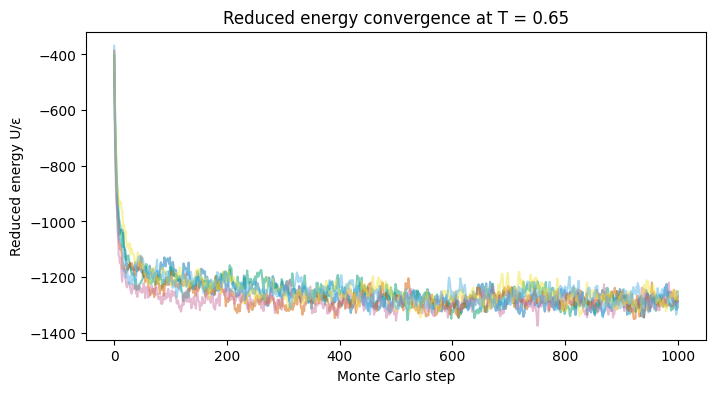

In [89]:
plt.figure(figsize = (8,4))
plt.plot(serial_df["Step"], serial_df["Energy"], alpha = 0.5)
plt.plot(numba_df["Step"], numba_df["Energy"], alpha = 0.5)
plt.plot(cython_df["Step"], cython_df["Energy"], alpha = 0.5)
plt.plot(vec_df["Step"], vec_df["Energy"], alpha = 0.5)
plt.plot(mpi4py_4core_df["Step"], mpi4py_4core_df["Energy"], alpha = 0.5)
plt.plot(mpi4py_1core_df["Step"], mpi4py_1core_df["Energy"], alpha = 0.5)

plt.xlabel('Monte Carlo step')
plt.ylabel('Reduced energy U/ε')
plt.title("Reduced energy convergence at T = 0.65")

plt.show

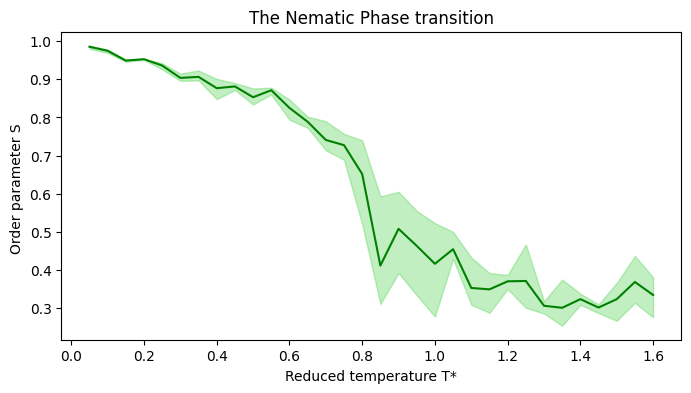

In [86]:
#For order drop plot

orderdrop1 = np.array([0.988, 0.977, 0.949, 0.953, 0.942, 0.900, 0.899, 0.848, 0.872, 0.876, 0.860, 0.794, 0.773, 0.790, 0.757, 0.520, 0.593, 0.605, 0.334, 0.448, 0.435, 0.309, 0.288, 0.387, 0.346, 0.315, 0.274, 0.324, 0.310, 0.366, 0.437, 0.276])
orderdrop2 = np.array([0.980, 0.978, 0.952, 0.954, 0.926, 0.915, 0.897, 0.881, 0.890, 0.849, 0.878, 0.834, 0.791, 0.719, 0.736, 0.740, 0.331, 0.527, 0.501, 0.523, 0.429, 0.433, 0.368, 0.350, 0.301, 0.286, 0.375, 0.309, 0.308, 0.338, 0.314, 0.381])
orderdrop3 = np.array([0.988, 0.969, 0.946, 0.951, 0.940, 0.896, 0.923, 0.901, 0.882, 0.834, 0.876, 0.847, 0.802, 0.714, 0.689, 0.695, 0.311, 0.392, 0.555, 0.278, 0.500, 0.317, 0.392, 0.374, 0.467, 0.318, 0.254, 0.338, 0.287, 0.267, 0.355, 0.347])
orderdrop = (orderdrop1 + orderdrop2 + orderdrop3)/3

order_min = np.minimum(np.minimum(orderdrop1, orderdrop2), orderdrop3)
order_max = np.maximum(np.maximum(orderdrop1, orderdrop2), orderdrop3)


orders = np.arange(0.05,1.65,0.05)

plt.figure(figsize=(8,4))
plt.plot(orders, orderdrop, color = 'green')
plt.xlabel('Reduced temperature T*')
plt.fill_between(orders, order_min, order_max, alpha=0.3,color = 'limegreen')
plt.ylabel('Order parameter S ')
plt.title("The Nematic Phase transition")
plt.show()

# Plotting figures with data from excel.

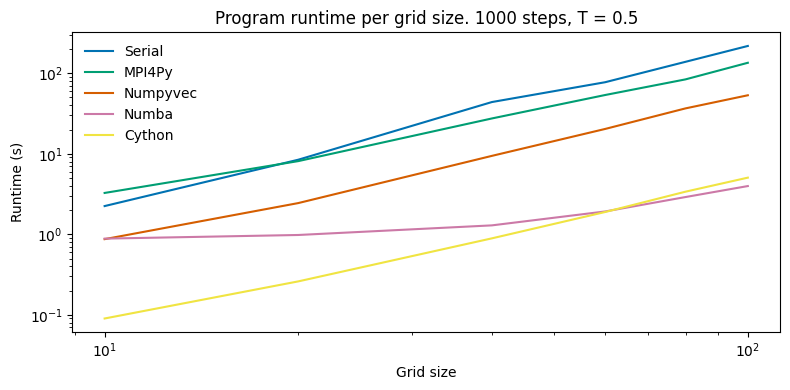

In [87]:
#This cell is for the plot of gridsize vs time per method.

allfigserial=[2.24, 8.43, 43.85, 77.297, 138.56, 218]
allfigcython=[0.09, 0.26, 0.89, 1.89, 3.38, 5.05]
allfignumba=[0.8833, 0.98, 1.29, 1.92, 2.9, 3.97]
allfignumpyvec=[0.87, 2.44, 9.41, 20.32, 36.58, 53.23]
allfigmpi4py8=[3.26, 8.1, 27.43, 53.62, 83.843, 134.78]
gridsizes = [10, 20, 40, 60, 80, 100]

plt.figure(figsize =(8,4))
colors = plt.get_cmap('Set1').colors
plt.plot(gridsizes, allfigserial, label='Serial')
plt.plot(gridsizes, allfigmpi4py8, label='MPI4Py')
plt.plot(gridsizes, allfignumpyvec, label='Numpyvec')
plt.plot(gridsizes, allfignumba, label='Numba')
plt.plot(gridsizes, allfigcython, label='Cython')
plt.legend(frameon=False)
plt.yscale('log') 
plt.xscale('log')
plt.xlabel('Grid size')
plt.ylabel('Runtime (s)')
plt.title("Program runtime per grid size. 1000 steps, T = 0.5")
plt.tight_layout()
plt.savefig("Allmethods.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

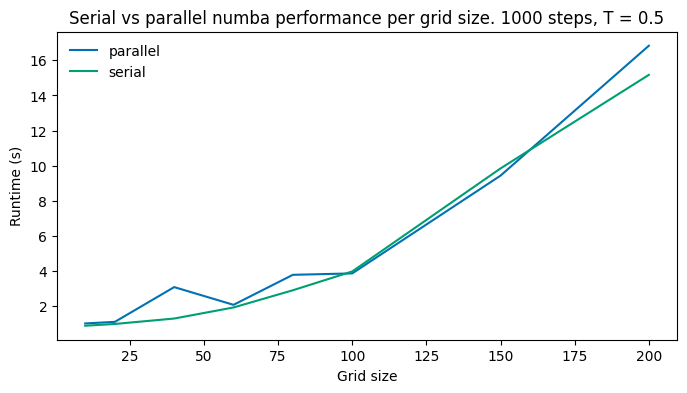

In [93]:
#This is to compare numba against parallel numba
numbaparallel = [1.01, 1.10, 3.08, 2.07, 3.78, 3.86, 9.43, 16.83]
numba_compare = [0.88, 0.98, 1.29, 1.92, 2.9, 3.97, 9.84, 15.17]
gridsizesnumba = [10, 20, 40, 60, 80, 100, 150, 200]

plt.figure(figsize = (8,4))
plt.plot(gridsizesnumba, numbaparallel, label = 'parallel')
plt.plot(gridsizesnumba, numba_compare, label = 'serial')

plt.legend(frameon=False)
plt.title("Serial vs parallel numba performance per grid size. 1000 steps, T = 0.5")
plt.xlabel('Grid size')
plt.ylabel('Runtime (s)')
plt.savefig("Numbaparallel.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

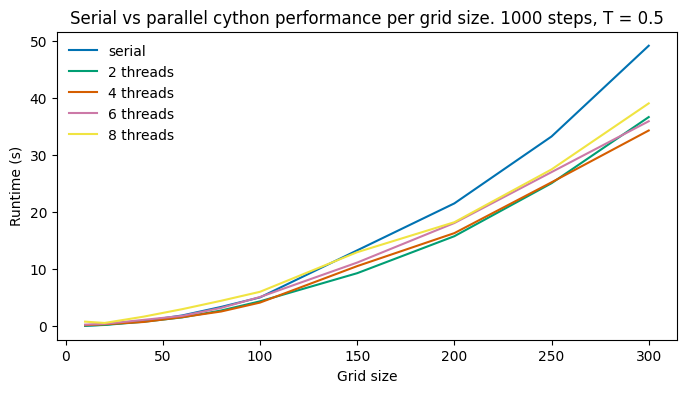

In [95]:
#This is to compare serial cython vs parallel cython
cython_compare = [0.09, 0.26, 0.89, 1.89, 3.38, 5.05, 13.29, 21.52, 33.24, 49.14]
cyth_2core = [0.087, 0.22, 0.78, 1.55, 2.75, 4.36, 9.29, 15.77, 25.05, 36.64]
cyth_4core = [0.18, 0.34, 0.74, 1.59, 2.58, 4.14, 10.53, 16.31, 25.21, 34.29]
cyth_6core = [0.28, 0.41, 1.11, 1.81, 3.21, 5.12, 11.15, 18.08, 27, 35.91]
cyth_8core = [0.8, 0.57, 1.67, 2.99, 4.46, 6.03, 12.97, 18.22, 27.47, 39.04]
gridsizescython =[10, 20, 40, 60, 80, 100, 150, 200, 250, 300]

plt.figure(figsize = (8,4))
plt.plot(gridsizescython, cython_compare, label = 'serial')
plt.plot(gridsizescython, cyth_2core, label = '2 threads')
plt.plot(gridsizescython, cyth_4core, label = '4 threads')
plt.plot(gridsizescython, cyth_6core, label = '6 threads')
plt.plot(gridsizescython, cyth_8core, label = '8 threads')

plt.legend(frameon=False)
plt.title("Serial vs parallel cython performance per grid size. 1000 steps, T = 0.5")
plt.xlabel('Grid size')
plt.ylabel('Runtime (s)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

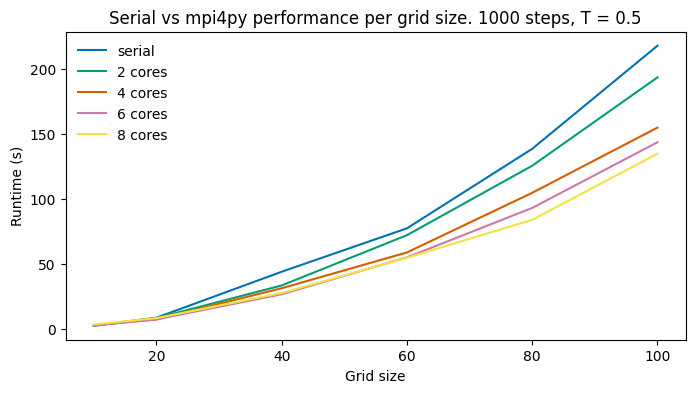

In [97]:
#This is for mpi4py

serial_serial=[2.24, 8.43, 43.85, 77.297, 138.56, 218]
mpi_2cores = [2.38, 8.12, 33.28, 72.03, 125.53, 193.60]
mpi_4cores = [2.65, 7.03, 31.13, 58.70, 104.66, 154.91]
mpi_6cores = [2.55, 7.17, 26.48, 54.91, 93.02, 143.61]
mpi_8cores = [3.27, 8.10, 27.43, 54.62, 83.84, 134.78]
gridsizes_mpi = [10, 20, 40, 60, 80, 100]

plt.figure(figsize = (8,4))
plt.plot(gridsizes_mpi, serial_serial, label = 'serial')
plt.plot(gridsizes_mpi, mpi_2cores, label = '2 cores')
plt.plot(gridsizes_mpi, mpi_4cores, label = '4 cores')
plt.plot(gridsizes_mpi, mpi_6cores, label = '6 cores')
plt.plot(gridsizes_mpi, mpi_8cores, label = '8 cores')

plt.legend(frameon=False)
plt.title("Serial vs mpi4py performance per grid size. 1000 steps, T = 0.5")
plt.xlabel('Grid size')
plt.ylabel('Runtime (s)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

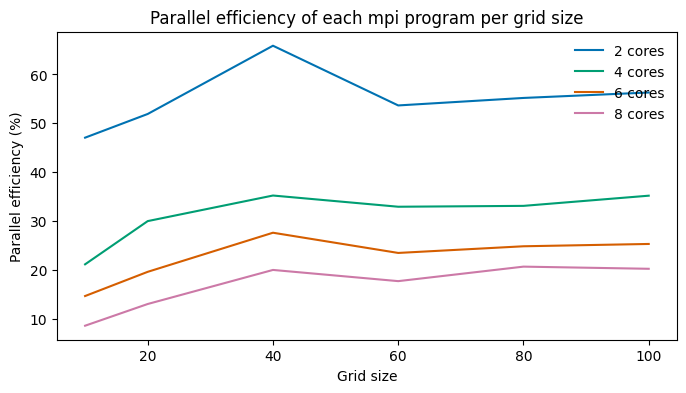

In [104]:
serial_serial=np.array([2.24, 8.43, 43.85, 77.297, 138.56, 218])
mpi_2cores = np.array([2.38, 8.12, 33.28, 72.03, 125.53, 193.60])
mpi_4cores = np.array([2.65, 7.03, 31.13, 58.70, 104.66, 154.91])
mpi_6cores = np.array([2.55, 7.17, 26.48, 54.91, 93.02, 143.61])
mpi_8cores = np.array([3.27, 8.10, 27.43, 54.62, 83.84, 134.78])
gridsizes_mpi2 = [10, 20, 40, 60, 80, 100]

def parallel_efficiency(serial, parallel, cores):
    return (serial / (parallel * cores))*100

eff2 = parallel_efficiency(serial_serial, mpi_2cores, 2)
eff4 = parallel_efficiency(serial_serial, mpi_4cores, 4)
eff6 = parallel_efficiency(serial_serial, mpi_6cores, 6)
eff8 = parallel_efficiency(serial_serial, mpi_8cores, 8)

plt.figure(figsize = (8,4))
plt.plot(gridsizes_mpi2, eff2, label = '2 cores')
plt.plot(gridsizes_mpi2, eff4, label = '4 cores')
plt.plot(gridsizes_mpi2, eff6, label = '6 cores')
plt.plot(gridsizes_mpi2, eff8, label = '8 cores')

plt.legend(frameon=False)
plt.title("Parallel efficiency of each mpi program per grid size")
plt.xlabel('Grid size')
plt.ylabel('Parallel efficiency (%)')
plt.show